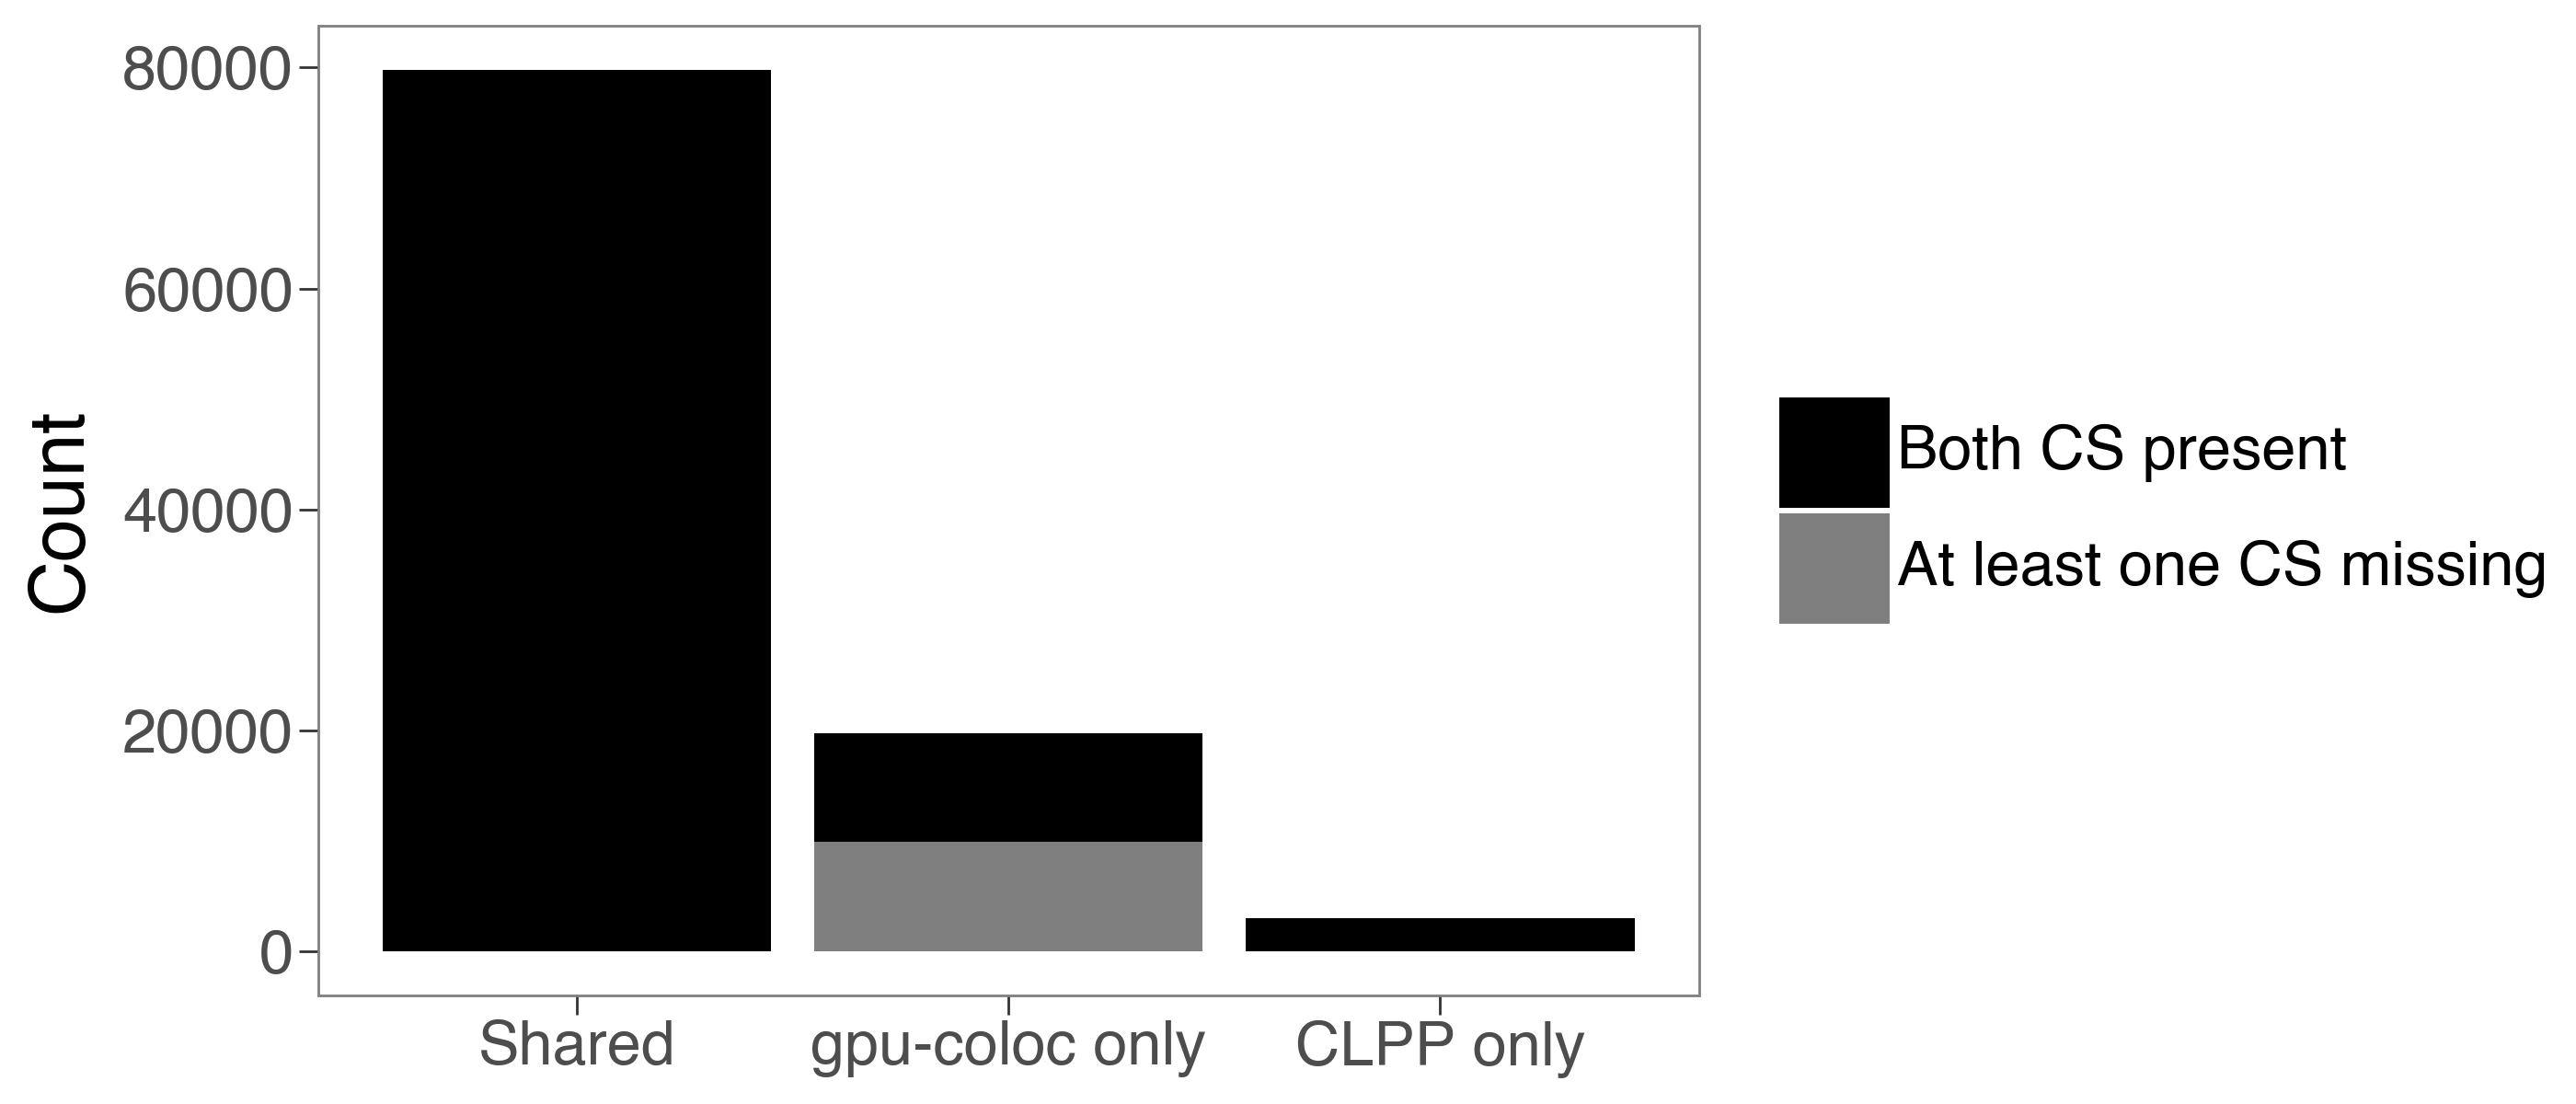

In [42]:
import numpy as np
import pandas as pd
from plotnine import (
    ggplot, aes, geom_bar, labs,
    scale_fill_manual, theme_bw, theme,
    element_text, element_blank
)

p1e6 = pd.read_csv("../data/finngen_lbf_results_0.8_1e-6.tsv", sep="\t")
clpp = pd.read_csv("../data/finngen_clpp_results.tsv", sep="\t")

clpp = clpp[clpp["signal_a"] != clpp["signal_b"]]
credible_sets = np.load("../data/FinnGen_and_eQTL_Catalogue_credible_sets.npy", allow_pickle=True).tolist()

clpp = clpp[(clpp["clpp"]>=0.04)]
p1e6 = p1e6[(p1e6["PP.H4"]>=0.8)]

merged = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'])
p1e6.shape[0], clpp.shape[0]

p1e6["FinnGen_cs"] = p1e6["signal1"].isin(credible_sets)
p1e6["EQTL_cs"] = p1e6["signal2"].isin(credible_sets)

p1e6["Category"] = "Neither"
p1e6.loc[p1e6["FinnGen_cs"] & p1e6["EQTL_cs"], "Category"] = "Both CS"
p1e6.loc[p1e6["FinnGen_cs"] & ~p1e6["EQTL_cs"], "Category"] = "Only FG CS"
p1e6.loc[~p1e6["FinnGen_cs"] & p1e6["EQTL_cs"], "Category"] = "Only eQTL CS"

category_counts = p1e6["Category"].value_counts()

both_cs_total = category_counts.get("Both CS", 0)
both_cs_in_merged = merged[
    merged["signal1"].isin(p1e6[p1e6["Category"] == "Both CS"]["signal1"]) &
    merged["signal2"].isin(p1e6[p1e6["Category"] == "Both CS"]["signal2"])
].shape[0]
both_cs_not_merged = both_cs_total - both_cs_in_merged

only_clpp = clpp.merge(merged, left_on=['signal_a', 'signal_b'], right_on=['signal1', 'signal2'], how='left', indicator=True)
only_clpp_count = only_clpp[only_clpp['_merge'] == 'left_only'].shape[0]

shared_both  = both_cs_in_merged                
gpu_both     = both_cs_not_merged             
gpu_missing  = (category_counts.get("Only FG CS", 0) +
                category_counts.get("Only eQTL CS", 0) +
                category_counts.get("Neither", 0)) 
clpp_both    = only_clpp_count               

plot_df = pd.DataFrame({
    "Group" : ["Shared",
               "gpu-coloc only", "gpu-coloc only",
               "CLPP only"],
    "Status": ["Both CS present",
               "Both CS present", "At least one CS missing",
               "Both CS present"],
    "Count" : [shared_both,
               gpu_both, gpu_missing,
               clpp_both]
})

plot_df["Group"] = pd.Categorical(plot_df["Group"],
                                  ["Shared", "gpu-coloc only", "CLPP only"])
plot_df["Status"] = pd.Categorical(plot_df["Status"],
                                   ["Both CS present", "At least one CS missing"])

(
    ggplot(plot_df, aes("Group", "Count", fill="Status")) +
    geom_bar(stat="identity", width=0.9, position="stack") +

    scale_fill_manual(values={
        "Both CS present": "#000000",      
        "At least one CS missing": "#7f7f7f"  
    }) +

    labs(x="", y="Count") +
    theme_bw(base_size=30) +
    theme(
        figure_size=(14, 6),
        axis_text_x=element_text(
            rotation=0, vjust=1,           
        ),
        panel_grid=element_blank(),          
        legend_title=element_blank()
    )
)

In [43]:
plot_df['Proportion'] = plot_df['Count'] / plot_df['Count'].sum()
plot_df

,Group,Status,Count,Proportion
0,Shared,Both CS present,79786,0.777831
1,gpu-coloc only,Both CS present,9841,0.095940
2,gpu-coloc only,At least one CS missing,9919,0.096700
3,CLPP only,Both CS present,3029,0.029530


In [44]:
(9841+9919)/(9841+9919+3029)

0.8670849971477467

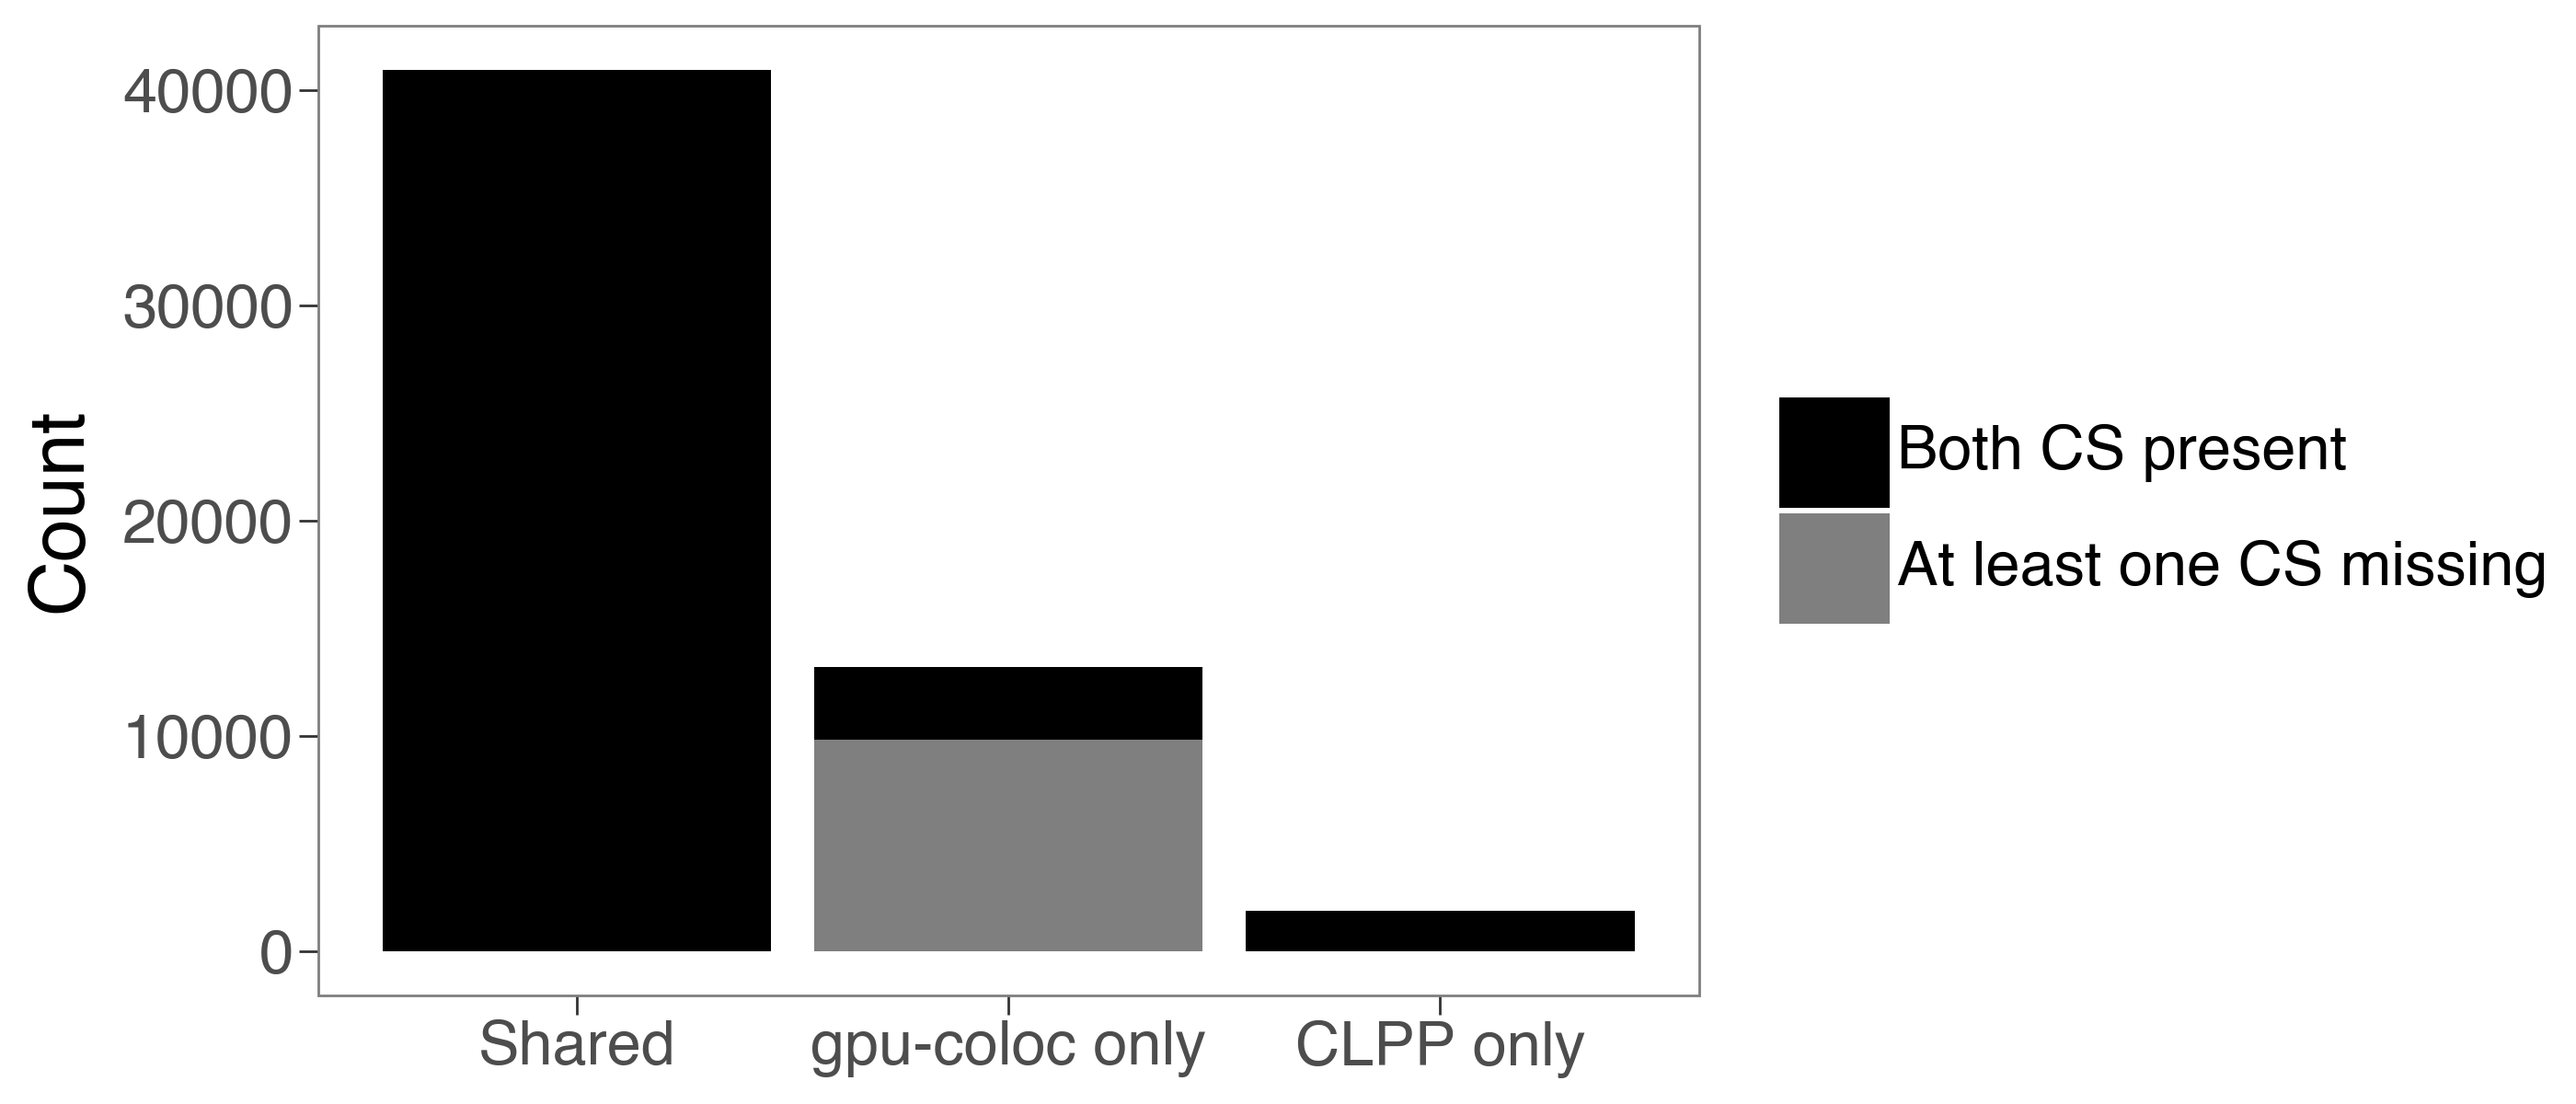

In [45]:
import numpy as np
import pandas as pd
from plotnine import (
    ggplot, aes, geom_bar, labs,
    scale_fill_manual, theme_bw, theme,
    element_text, element_blank
)

p1e6 = pd.read_csv("../data/metabolic_lbf_results_0.8_1e-6.tsv", sep="\t")
clpp = pd.read_csv("../data/met_ge_clpp.tsv", sep="\t")

clpp = clpp[clpp["signal_a"] != clpp["signal_b"]]
credible_sets = np.load("../data/FinnGen_and_eQTL_Catalogue_credible_sets.npy", allow_pickle=True).tolist()

met = pd.read_csv("../data/56_metabolites_finemapping_credible_sets.tsv", sep="\t")
met_credible_sets = list(met["cs_id"].unique())

clpp = clpp[(clpp["clpp"]>=0.04)]
p1e6 = p1e6[(p1e6["PP.H4"]>=0.8)]

merged = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'])
p1e6.shape[0], clpp.shape[0]

p1e6["Met_cs"] = p1e6["signal1"].isin(met_credible_sets)
p1e6["EQTL_cs"] = p1e6["signal2"].isin(credible_sets)

p1e6["Category"] = "Neither"
p1e6.loc[p1e6["Met_cs"] & p1e6["EQTL_cs"], "Category"] = "Both CS"
p1e6.loc[p1e6["Met_cs"] & ~p1e6["EQTL_cs"], "Category"] = "Only Met CS"
p1e6.loc[~p1e6["Met_cs"] & p1e6["EQTL_cs"], "Category"] = "Only eQTL CS"

category_counts = p1e6["Category"].value_counts()

both_cs_total = category_counts.get("Both CS", 0)
both_cs_in_merged = merged[
    merged["signal1"].isin(p1e6[p1e6["Category"] == "Both CS"]["signal1"]) &
    merged["signal2"].isin(p1e6[p1e6["Category"] == "Both CS"]["signal2"])
].shape[0]
both_cs_not_merged = both_cs_total - both_cs_in_merged

only_clpp = clpp.merge(merged, left_on=['signal_a', 'signal_b'], right_on=['signal1', 'signal2'], how='left', indicator=True)
only_clpp_count = only_clpp[only_clpp['_merge'] == 'left_only'].shape[0]

shared_both  = both_cs_in_merged                
gpu_both     = both_cs_not_merged             
gpu_missing  = (category_counts.get("Only FG CS", 0) +
                category_counts.get("Only eQTL CS", 0) +
                category_counts.get("Neither", 0)) 
clpp_both    = only_clpp_count               

plot_df = pd.DataFrame({
    "Group" : ["Shared",
               "gpu-coloc only", "gpu-coloc only",
               "CLPP only"],
    "Status": ["Both CS present",
               "Both CS present", "At least one CS missing",
               "Both CS present"],
    "Count" : [shared_both,
               gpu_both, gpu_missing,
               clpp_both]
})

plot_df["Group"] = pd.Categorical(plot_df["Group"],
                                  ["Shared", "gpu-coloc only", "CLPP only"])
plot_df["Status"] = pd.Categorical(plot_df["Status"],
                                   ["Both CS present", "At least one CS missing"])

(
    ggplot(plot_df, aes("Group", "Count", fill="Status")) +
    geom_bar(stat="identity", width=0.9, position="stack") +

    scale_fill_manual(values={
        "Both CS present": "#000000",      
        "At least one CS missing": "#7f7f7f"  
    }) +

    labs(x="", y="Count") +
    theme_bw(base_size=30) +
    theme(
        figure_size=(14, 6),
        axis_text_x=element_text(
            rotation=0, vjust=1,           
        ),
        panel_grid=element_blank(),          
        legend_title=element_blank()
    )
)

In [46]:
plot_df['Proportion'] = plot_df['Count'] / plot_df['Count'].sum()
plot_df

,Group,Status,Count,Proportion
0,Shared,Both CS present,40926,0.730874
1,gpu-coloc only,Both CS present,3361,0.060022
2,gpu-coloc only,At least one CS missing,9828,0.175513
3,CLPP only,Both CS present,1881,0.033592


In [47]:
(3361+9828)/(3361+9828+1881)

0.8751824817518248

In [48]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
from collections import Counter

l = []

p1e6 = pd.read_csv("../data/finngen_lbf_results_0.8_1e-6.tsv", sep="\t")
clpp = pd.read_csv("../data/finngen_clpp_results.tsv", sep="\t")

clpp = clpp[(clpp["clpp"]>=0.04)]
p1e6 = p1e6[p1e6["PP.H4"] >= 0.8]

cs_keys = {
    "_".join(node.rsplit('_', 1)[:-1])
    for node in list(p1e6['signal1'].unique()) + list(p1e6['signal2'].unique())
}

removed_counts = {}
duplicate_percentage = 0

G = nx.Graph()
G.add_edges_from(zip(p1e6['signal1'], p1e6['signal2']))

total = 0
dup = 0
for comp in tqdm(nx.connected_components(G),leave=False):
    total += 1
    nodes = list(comp)
    key_counts = Counter(n.rsplit('_', 1)[0] for n in nodes)
    if any(k in cs_keys and cnt >= 2 for k, cnt in key_counts.items()):
        dup += 1

duplicate_percentage = (dup / total * 100) if total else 0

duplicate_percentage

0.7393209200438117

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
from collections import Counter

l = []

df = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how="outer")
credible_sets = np.load("../data/FinnGen_and_eQTL_Catalogue_credible_sets.npy", allow_pickle=True).tolist()

df = df.dropna(subset=["signal1", "signal2"])
df["signal1_cs"] = df["signal1"].isin(credible_sets)
df["signal2_cs"] = df["signal2"].isin(credible_sets)

df["Category"] = "Neither"
df.loc[df["signal1_cs"] & df["signal2_cs"], "Category"] = "Both CS"
df.loc[df["signal1_cs"] & ~df["signal2_cs"], "Category"] = "One CS"
df.loc[~df["signal1_cs"] & df["signal2_cs"], "Category"] = "One CS"

df = df[~df["Category"].isin(["Neither", "One CS"])]

cs_keys = {
    "_".join(node.rsplit('_', 1)[:-1])
    for node in list(p1e6['signal1'].unique()) + list(p1e6['signal2'].unique())
}

removed_counts = {}
duplicate_percentage = 0

G = nx.Graph()
G.add_edges_from(zip(df['signal1'], df['signal2']))

total = 0
dup = 0
for comp in tqdm(nx.connected_components(G), leave=False):
    total += 1
    nodes = list(comp)
    key_counts = Counter(n.rsplit('_', 1)[0] for n in nodes)
    if any(k in cs_keys and cnt >= 2 for k, cnt in key_counts.items()):
        dup += 1

duplicate_percentage = (dup / total * 100) if total else 0

duplicate_percentage

0.5905511811023622

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
from collections import Counter

l = []


df = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how="inner")

df = df.dropna(subset=["signal1", "signal2"])
df = df.dropna(subset=["signal_a", "signal_b"])

df = df.drop_duplicates(subset=["signal1", "signal2"])
df = df.drop_duplicates(subset=["signal_a", "signal_b"])

cs_keys = {
    "_".join(node.rsplit('_', 1)[:-1])
    for node in list(p1e6['signal1'].unique()) + list(p1e6['signal2'].unique())
}

removed_counts = {}
duplicate_percentage = 0

G = nx.Graph()
G.add_edges_from(zip(df['signal_a'], df['signal_b']))

total = 0
dup = 0
for comp in tqdm(nx.connected_components(G), leave=False):
    total += 1
    nodes = list(comp)
    key_counts = Counter(n.rsplit('_', 1)[0] for n in nodes)
    if any(k in cs_keys and cnt >= 2 for k, cnt in key_counts.items()):
        dup += 1

duplicate_percentage = (dup / total * 100) if total else 0

duplicate_percentage

0.2823861630780092

In [54]:
import gc, re
from collections import Counter

import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm
from plotnine import scale_y_continuous
from plotnine import (
    ggplot, aes, geom_line, geom_point, geom_text,
    scale_x_continuous, labs, theme_classic, theme, element_text
)

bk = lambda s: "_".join(s.rsplit("_", 1)[:-1])         

def pct_dup_clusters(df_edges: pd.DataFrame) -> float:
    if df_edges.empty:
        return 0.0

    g = nx.from_pandas_edgelist(df_edges, "signal_a", "signal_b")

    cs_keys = {
    "_".join(node.rsplit('_', 1)[:-1])
    for node in g.nodes
    }

    dup, total = 0, 0   
    for comp in nx.connected_components(g):
        total += 1
        nodes = list(comp)
        key_counts = Counter(n.rsplit('_', 1)[0] for n in nodes)
        if any(k in cs_keys and cnt >= 2 for k, cnt in key_counts.items()):
            dup += 1
    return dup / total * 100.0 if total else 0.0

thr_values = [0.04] 

df_clpp = pd.read_csv("../data/finngen_clpp_results.tsv", sep="\t")

df_clpp = df_clpp[df_clpp["signal_a"]!= df_clpp["signal_b"]]

thr_dup_pct = []
for t in tqdm(thr_values, desc="CLPP threshold sweep"):
    sel = df_clpp[df_clpp.clpp > t][["signal_a", "signal_b"]]
    thr_dup_pct.append(pct_dup_clusters(sel))
    gc.collect()

bar_df = pd.DataFrame({"threshold": thr_values, "dup_pct": thr_dup_pct})
bar_df  

CLPP threshold sweep: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


,threshold,dup_pct
0,0.04,0.312175


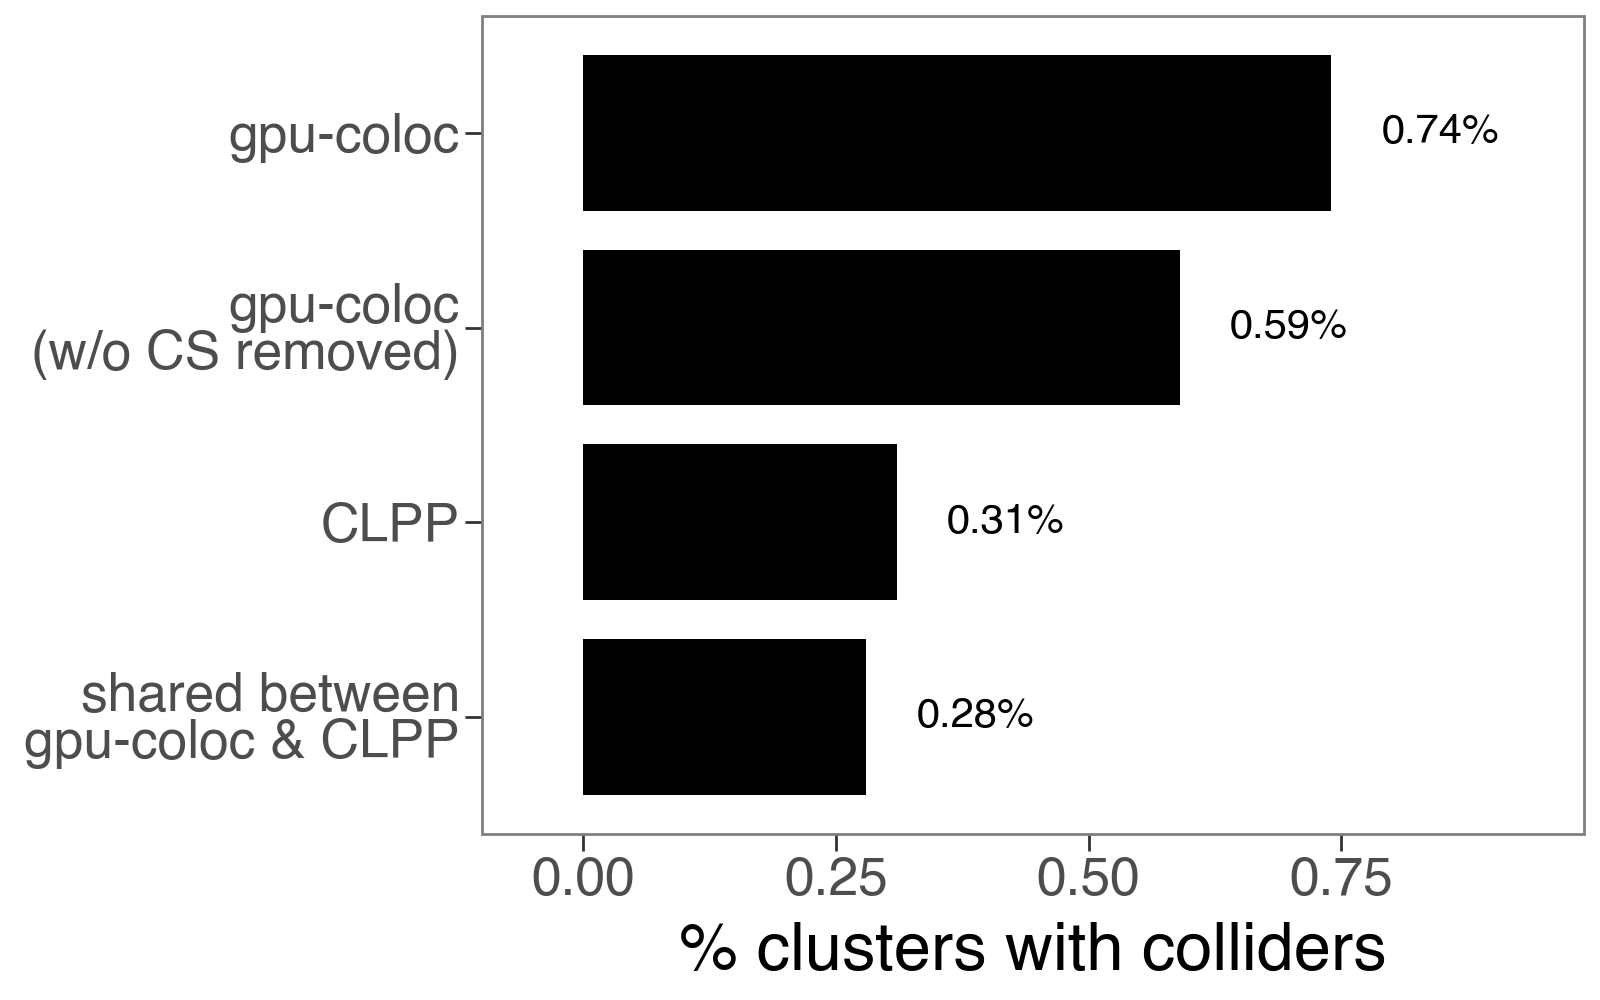

In [58]:
from plotnine import *
import pandas as pd

d = {
    "gpu-coloc": 0.74,
    "gpu-coloc\n (w/o CS removed)": 0.59,
    "CLPP": 0.31,
    "shared between\ngpu-coloc & CLPP": 0.28
}

df = (pd.DataFrame(d.items(), columns=['index', 'value'])
        .sort_values('value', ascending=True))
df['index'] = pd.Categorical(df['index'], categories=df['index'], ordered=True)
df['label'] = df['value'].apply(lambda x: f'{x:.2f}%')

gap = 0.05      
pad = 0.2        

(
    ggplot(df, aes(x='index', y='value'))
    + geom_bar(stat='identity', width=.8, fill='black')


    + geom_text(aes(label='label'),       ha='left',  nudge_y= gap, size=15)

    + coord_flip()
    + scale_y_continuous(expand=(0, 0.1 ,0, pad)) 
    + labs(x='', y='% clusters with colliders')
    + theme_bw(base_size=24)
    + theme(panel_grid=element_blank(), figure_size=(8, 5))
)


In [59]:
import pandas as pd
import networkx as nx
from tqdm import tqdm
from collections import Counter

l = []

p1e6 = pd.read_csv("../data/metabolic_lbf_results_0.8_1e-6.tsv", sep="\t")
clpp = pd.read_csv("../data/met_ge_clpp.tsv", sep="\t")

clpp = clpp[(clpp["clpp"]>=0.04)]
p1e6 = p1e6[p1e6["PP.H4"] >= 0.8]

cs_keys = {
    "_".join(node.rsplit('_', 1)[:-1])
    for node in list(p1e6['signal1'].unique()) + list(p1e6['signal2'].unique())
}

removed_counts = {}
duplicate_percentage = 0

G = nx.Graph()
G.add_edges_from(zip(p1e6['signal1'], p1e6['signal2']))

total = 0
dup = 0
for comp in tqdm(nx.connected_components(G),leave=False):
    total += 1
    nodes = list(comp)
    key_counts = Counter(n.rsplit('_', 1)[0] for n in nodes)
    if any(k in cs_keys and cnt >= 2 for k, cnt in key_counts.items()):
        dup += 1

duplicate_percentage = (dup / total * 100) if total else 0

duplicate_percentage

1.3262599469496021

In [8]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
from collections import Counter

l = []

df = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how="outer")
credible_sets = np.load("../data/UKBB_and_eQTL_Catalogue_credible_sets.npy", allow_pickle=True).tolist()

df = df.dropna(subset=["signal1", "signal2"])
df["signal1_cs"] = df["signal1"].isin(credible_sets)
df["signal2_cs"] = df["signal2"].isin(credible_sets)

df["Category"] = "Neither"
df.loc[df["signal1_cs"] & df["signal2_cs"], "Category"] = "Both CS"
df.loc[df["signal1_cs"] & ~df["signal2_cs"], "Category"] = "One CS"
df.loc[~df["signal1_cs"] & df["signal2_cs"], "Category"] = "One CS"

df = df[~df["Category"].isin(["Neither", "One CS"])]

cs_keys = {
    "_".join(node.rsplit('_', 1)[:-1])
    for node in list(p1e6['signal1'].unique()) + list(p1e6['signal2'].unique())
}

removed_counts = {}
duplicate_percentage = 0

G = nx.Graph()
G.add_edges_from(zip(df['signal1'], df['signal2']))

total = 0
dup = 0
for comp in tqdm(nx.connected_components(G), leave=False):
    total += 1
    nodes = list(comp)
    key_counts = Counter(n.rsplit('_', 1)[0] for n in nodes)
    if any(k in cs_keys and cnt >= 2 for k, cnt in key_counts.items()):
        dup += 1

duplicate_percentage = (dup / total * 100) if total else 0

duplicate_percentage

0.5995203836930456

In [9]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
from collections import Counter

l = []


df = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how="inner")

df = df.dropna(subset=["signal1", "signal2"])
df = df.dropna(subset=["signal_a", "signal_b"])

df = df.drop_duplicates(subset=["signal1", "signal2"])
df = df.drop_duplicates(subset=["signal_a", "signal_b"])

cs_keys = {
    "_".join(node.rsplit('_', 1)[:-1])
    for node in list(p1e6['signal1'].unique()) + list(p1e6['signal2'].unique())
}

removed_counts = {}
duplicate_percentage = 0

G = nx.Graph()
G.add_edges_from(zip(df['signal_a'], df['signal_b']))

total = 0
dup = 0
for comp in tqdm(nx.connected_components(G), leave=False):
    total += 1
    nodes = list(comp)
    key_counts = Counter(n.rsplit('_', 1)[0] for n in nodes)
    if any(k in cs_keys and cnt >= 2 for k, cnt in key_counts.items()):
        dup += 1

duplicate_percentage = (dup / total * 100) if total else 0

duplicate_percentage

0.49019607843137253

In [10]:
import gc, re
from collections import Counter

import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm
from plotnine import scale_y_continuous
from plotnine import (
    ggplot, aes, geom_line, geom_point, geom_text,
    scale_x_continuous, labs, theme_classic, theme, element_text
)

bk = lambda s: "_".join(s.rsplit("_", 1)[:-1])         

def pct_dup_clusters(df_edges: pd.DataFrame) -> float:
    if df_edges.empty:
        return 0.0

    g = nx.from_pandas_edgelist(df_edges, "signal_a", "signal_b")

    cs_keys = {
    "_".join(node.rsplit('_', 1)[:-1])
    for node in g.nodes
    }

    dup, total = 0, 0   
    for comp in nx.connected_components(g):
        total += 1
        nodes = list(comp)
        key_counts = Counter(n.rsplit('_', 1)[0] for n in nodes)
        if any(k in cs_keys and cnt >= 2 for k, cnt in key_counts.items()):
            dup += 1
    return dup / total * 100.0 if total else 0.0

thr_values = [0.04] 

df_clpp = pd.read_csv("../data/finngen_clpp_results.tsv", sep="\t")

df_clpp = df_clpp[df_clpp["signal_a"]!= df_clpp["signal_b"]]

thr_dup_pct = []
for t in tqdm(thr_values, desc="CLPP threshold sweep"):
    sel = df_clpp[df_clpp.clpp > t][["signal_a", "signal_b"]]
    thr_dup_pct.append(pct_dup_clusters(sel))
    gc.collect()

bar_df = pd.DataFrame({"threshold": thr_values, "dup_pct": thr_dup_pct})
bar_df  

CLPP threshold sweep: 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


,threshold,dup_pct
0,0.04,0.312175


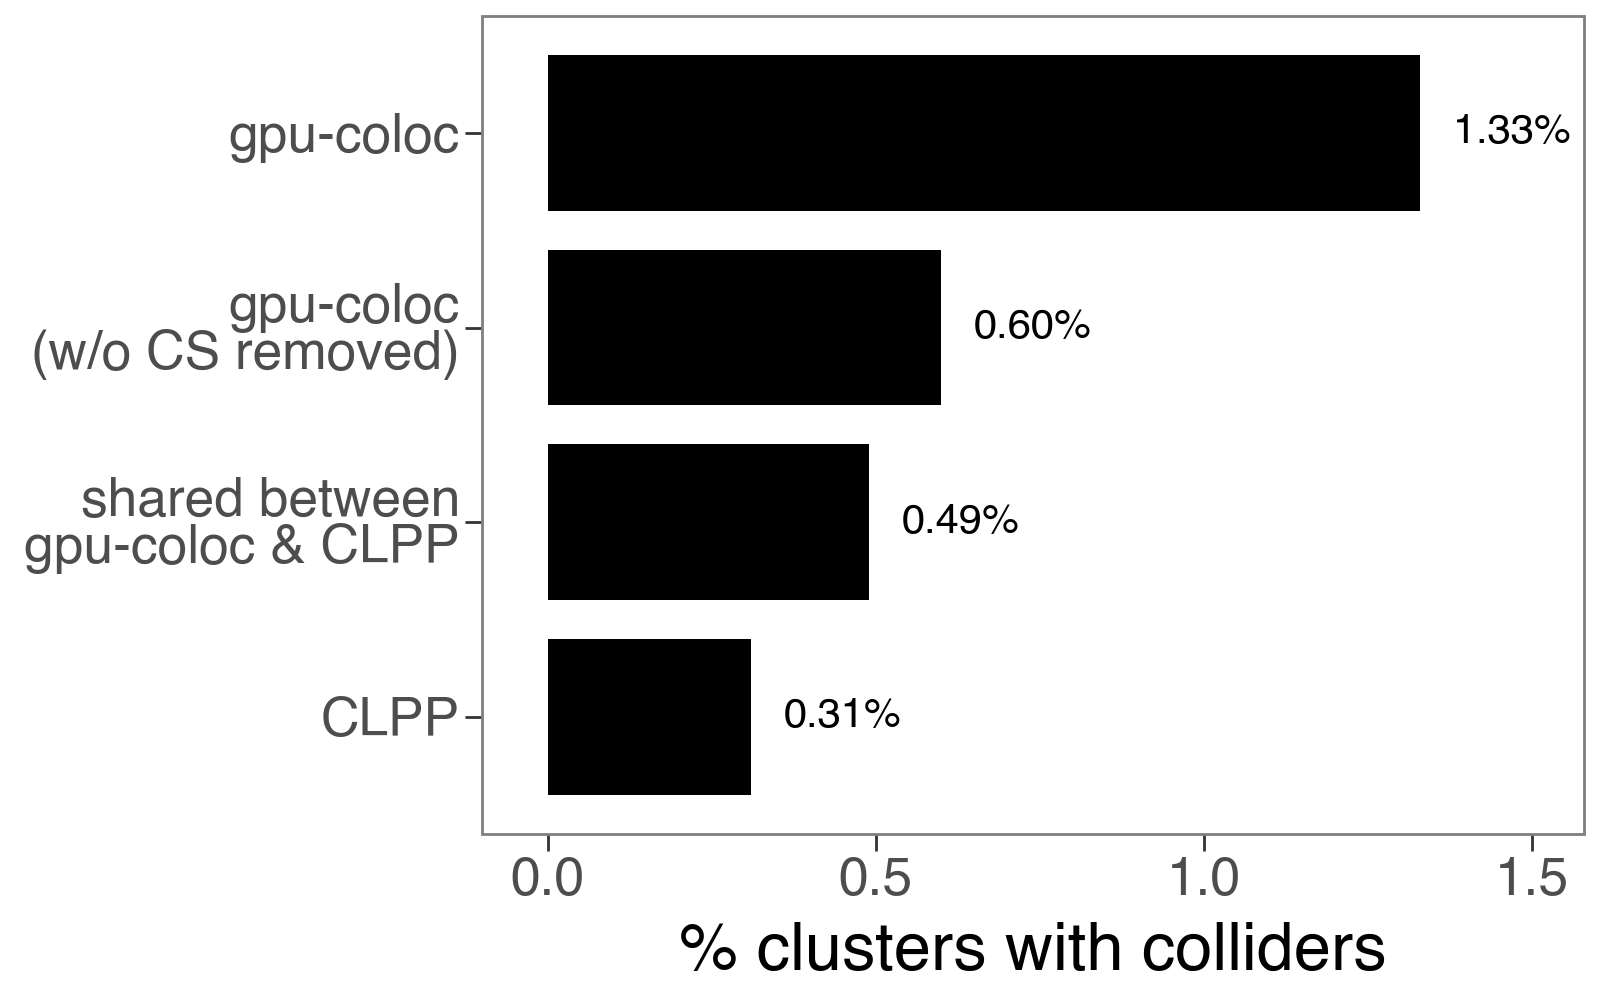

In [11]:
from plotnine import *
import pandas as pd

d = {
    "gpu-coloc": 1.33,
    "gpu-coloc\n (w/o CS removed)": 0.6,
    "CLPP": 0.31,
    "shared between\ngpu-coloc & CLPP": 0.49
}

df = (pd.DataFrame(d.items(), columns=['index', 'value'])
        .sort_values('value', ascending=True))
df['index'] = pd.Categorical(df['index'], categories=df['index'], ordered=True)
df['label'] = df['value'].apply(lambda x: f'{x:.2f}%')

gap = 0.05      
pad = 0.2        

(
    ggplot(df, aes(x='index', y='value'))
    + geom_bar(stat='identity', width=.8, fill='black')


    + geom_text(aes(label='label'),       ha='left',  nudge_y= gap, size=15)

    + coord_flip()
    + scale_y_continuous(expand=(0, 0.1 ,0, pad)) 
    + labs(x='', y='% clusters with colliders')
    + theme_bw(base_size=24)
    + theme(panel_grid=element_blank(), figure_size=(8, 5))
)
